# ML: Supervised Learning
# Predicting Contact Lense Type using Decision Tree
------------------

## Step 0: Inport
Here, we import all neccessary libraries and modules.
We will be working with external files mostly, which are 
- **treePlotter.py**: It contain all the code for plotting the decision tree graph
- **saveDT.py**: It contain all the code for saving and loading the classifier.

In [16]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, r'../py_files/')

#import tree
#import treePlotter
#import saveDT

from math import log
import operator
from collections import namedtuple
import saveDT
import treePlotter
from pdb import set_trace



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1: Business Understanding
### Step 1.1 Project Objectives

In Supervised Learning, Decision Trees are one of the most popular and most used machine learning algorithms. Some libraries like scikit-learn implements this algorithm which facilitates their usage. However, in this project, I will build this algorithm from scratch with Python to solve the problem "Predicting Contact Lens Type". Also, I will integrate this algorithm into a GUI which could be used by non-technical individuals to predict contact lens type.

### Step 1.2: Project Plan

The project will be divided in to **2 sections**. The first section will deal with
- Data aquisition
- data analysis
- data preparation
- model building
- Evaluation
- Deployment

The second section will deal with
- GUI intergration
- Evaluation
- Deployment

In each of these steps, we will write python code to complete them

### Step 1.3: Business success criteria
The following criteria will determine whether this project has been successful
- Build decision trees algorithm from scratch in Python
- Predict contact lens type using the decision treee built from scratch
- Intergrate the decision tree algorithm into a GUI
- GUI is easy to use and attractive in the eyes.

### Step 1.4: Poject Requirements
To complete this project, you will need a computer. The required packages and libraries can be found in the `requirement.txt` fiel. You could install all dependencies from the file with *pip* as:
`pip install -r requirements.txt`



## SECTION 1: Implementation and testing
In this section, I will implement the various parts of the project and ensure that it works well by testing them. This section enables us to have an insight on what is going on in the program. Also, it will facilitate maintanance since here, we are exposed with every details about the program backend.

### Step 1: Data understanding
#### Step 1.1 : Data acquisition
We will use the lenses dataset from the **UCI Machine Learning Repository November 3, 2010** [http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/]. It's a number of observations based on patients eye conditions and the type of contact lenses the doctor prescribed.

The dataset from the UCI repository has 3 files
- lense.data.txt
- lenses.names.txt
- index.txt

The `lense.data.txt` is made up of the actual data. However, the content of this file is all in numerical representations. By using the description from the `lense.name.txt` file, we will construct a more representative data file from the `lense.data.txt` file called `lenses.txt` so that it can be displayed easier.





#### Step 1.2 Extract data and create label classes

**NB:** *While collecting the data, we should ensure that we take care of the tab-delimited lines.*

In [3]:
# Extract the data. Be aware of tab-delimited lines
lenses = []
with open('data/lenses','r') as fr:
    # .strip() removes all leading and trailing spaces from the string
    # .split(\t) will split or create a list of each string separated at each tab(\t)
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    
# Create label classes
lensesLabels = ['age','prescript','astigmatic','tearRate']

In [4]:
print('data is :{0}'.format(lenses))
print('\nLense Labels are {0}'.format(lensesLabels))

data is :[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'n

#### Step 1.3: Explore Data
Looking at the `lenses.names.txt` file, we see that the data has **24 number of instances** with **4 attributes**:

- age of the patient [ young, pre-presbyopic, prespyopic]
- spectacle prescription [ myope, hypermetrope]
- astigmatic: [no, yes]
- tear production rate: [reduced, normal]

And **3 label classes**:

- hard contact lenses
- soft contact lenses
- no contact lenses

NB: The aboves are originally represented as numeric in the `lenses.data.txt` file.

```
1  1  1  1  1  3
2  1  1  1  2  2
3  1  1  2  1  3
4  1  1  2  2  1
5  1  2  1  1  3
6  1  2  1  2  2
7  1  2  2  1  3
8  1  2  2  2  1
9  2  1  1  1  3
10 2  1  1  2  2
11 2  1  2  1  3
12 2  1  2  2  1
13 2  2  1  1  3
14 2  2  1  2  2
15 2  2  2  1  3
16 2  2  2  2  3
17 3  1  1  1  3
18 3  1  1  2  3
19 3  1  2  1  3
20 3  1  2  2  1
21 3  2  1  1  3
22 3  2  1  2  2
23 3  2  2  1  3
24 3  2  2  2  3
```

### Step 3: Data preparation
#### Step 3.1: Construct required data
As seen above, our dataset are originally represented as numeric in the `lenses.data.txt` file. And since one of the **Pros** of decision tree is that *it's easy for humans to understand learned results*, we will preprocess our dataset to represent it in a more human-understandable way.

Using the `lenses.names.txt`, we preprocessed a new file `lenses.txt`
```
young	myope	no	reduced	no lenses
young	myope	no	normal	soft
young	myope	yes	reduced	no lenses
young	myope	yes	normal	hard
young	hyper	no	reduced	no lenses
young	hyper	no	normal	soft
young	hyper	yes	reduced	no lenses
young	hyper	yes	normal	hard
pre	myope	no	reduced	no lenses
pre	myope	no	normal	soft
pre	myope	yes	reduced	no lenses
pre	myope	yes	normal	hard
pre	hyper	no	reduced	no lenses
pre	hyper	no	normal	soft
pre	hyper	yes	reduced	no lenses
pre	hyper	yes	normal	no lenses
presbyopic	myope	no	reduced	no lenses
presbyopic	myope	no	normal	no lenses
presbyopic	myope	yes	reduced	no lenses
presbyopic	myope	yes	normal	hard
presbyopic	hyper	no	reduced	no lenses
presbyopic	hyper	no	normal	soft
presbyopic	hyper	yes	reduced	no lenses
presbyopic	hyper	yes	normal	no lenses
```

### Step 4: Modelling
The modeling technique I will use here is **Decision Tree**. 
To build the decision tree, I will need to make a first decision on the dataset to dictate which feature is used to split the data. To determine this, I will try every feature and measure which split will give me the best results. After that, I'll split the dataset into subsets. The subsets will then traverse down the branches of the first decision node. If the data on the branches are the same class, then I've properly classified it and don't need to continue splitting it. If the data isn't the same class, I will continue the  splitting process on the subset.

The follwoing steps are neccessary to build a complete decision tree algorithm:


### Step 4.1 Shannon Entropy
We choose to split our dataset in a way that makes our unorganized data more organized. There are multiple ways to do this. One way is to measure the information using **Information theory**. 

Information theory is a branch of science that's concerned with quantifying information. Change in information before and after the split is known as the **information gain** and the split with the highest information gain is your best option.

The measure of information of a set is known as the **Shannon entropy**, or just entropy for short. Its name comes from the father of information theory, **Claude Shannon**.

To calculate entropy, you need the expected value of all the information of all possible values of our class. This is given by:

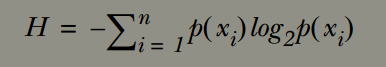

Where:
- *n* is the number of classes,
- *p(xi)* is the probability of choosing this class

**NB**:* If the entropy result is **0**, then it shows that all the information belong in the same class, and vise vesa. But if **1**, then it is uniformly distributed within a set of classes. However, the higher the entropy(>1), the more mixed up the data is.*

Lets write some python code to implement this entropy

In [5]:
def calcShannonEnt(dataset):   
    """
    This calculates the Shannon Entropy which is the measure of the amount of uncertainty in the data
    or the expected value of an information.
    This tells us how the data is distributed through out some classes. 

    -----------------------------
    INPUT:
        dataset: List
            contains list of labels and values 
    OUTPUT:
        shannonEnt: Float
            return the shannon entropy of the dataset
    """    
    
    numEntries = len(dataset)                         #get length
    labelCounts = {}                                  # Dict to hold all labels in the dataset
    #here we get the frequency of the data label
    for featVec in dataset:
        currentLabel = featVec[-1]                    #get the last value in the list. which is the label. eg [1,1, 'yes']
        '''
        if currentLabel not in labelCounts.keys():    #check if the label is not yet in the dictionary
            labelCounts[currentLabel] = 0             #add it with an initial value of zero
        labelCounts[currentLabel] += 1                #This will increment each time it sees the label.
        '''
        labelCounts[currentLabel] = labelCounts.get(currentLabel,0) + 1
    shannonEnt = 0.0
    #here we calculate the log
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries     #calculate the probability [each label frequency/dataset length]
        shannonEnt -= prob * log(prob,2)              #This is where the entropy formula is been applied P(xi)log2P(xi)
    return shannonEnt

Lets create a dataset to test our entropy function

In [6]:
def createDataset():
    dataset = [	[1, 1, 'yes'],
                [1, 1, 'yes'],
                [1,1, 'maybe'],
                [1,0, 'no'],
                [0,1, 'no'],
                [0,1, 'no']]

    labels = ['no surfacing','flippers','not sure']
    dataset_created = namedtuple('data',['dataset','labels'])
    return dataset_created(dataset, labels)

Lets test our entropy function

In [7]:
data = createDataset()
shannonEntrop = calcShannonEnt(data.dataset)
print("Shannon Entropy is {0}".format(shannonEntrop))

Shannon Entropy is 1.4591479170272448


#### Discussion 4.1.1: 
We see that the result is **1.45..** which is >1. Hence, the data is more mixed up

### Step 4.2 Splitting dataset
The next step is splitting the dataset. We saw already above how to measure the amount of disorder in the dataset. Here, we measure the entropy, split the dataset, measure the entropy on the split sets, and see if splitting it was the right thing to do. We will do this for all of our features to determine the best feature to split on.

**NB**: *This function will be used recursively on all features in the dataset to determine the best feature to split on.*

In [8]:
def splitDataSet(dataSet, axis, value):
    '''
    Decision tree consist of seperating data, calculating the entropy change, and over and over
    This function provides the spliting feature of this system.
    --------------------
    INPUT:
        - dataSet: list 
            list of the data set
        - axis: int
            the axis(index) to split on
        - value: int
            The value of the axis feature to split on.
    OUTPUT: retDataSet: list
        List of splitted data on an axis.
    @Hint:
        - This fxn will be called recursively, so we need to create an array for each call.
        which will hold the split result, since list are mutable.
    '''
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

We call this function once in a dataset to have a feel on how it works.
```
    data = [[1, 1, 'yes'], [1, 1, 'yes'],[1, 1, 'maybe'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
            * for axis = 0, value = 1.
            for dataFeature in data:
                if dataFeature[axis] == value:
                        ====[[1, 1, 'yes'], [1, 1, 'yes'],[1, 1, 'maybe'],[1, 0, 'no']]
                reducedFeatVec = dataFeature[:axis] ------(1)
                        ==== [1],[1],[1],[0]
                dataFeature[axis+1:] 
                        ==== ['yes'],['yes'],['maybe'],['no']-----(2)
                when we extend (1) and (2), we have 
                       ====  [[1,'yes'],[1,'yes'],[1,'maybe'],[0,'no']]
```

In [9]:
split = splitDataSet(data.dataset, 0,1)
print('split data is {0}'.format(split))

split data is [[1, 'yes'], [1, 'yes'], [1, 'maybe'], [0, 'no']]


### Step 4.3: Choosing the best feature to split on
We saw Shannon entropy which calculated the amount of disorder, and also how to split our dataset. Now we are going to combine these 2 functions for the purpose of splitting the dataset on each feature to determine the best feature to split on.

The `splitDataSet()` function will be called recursively on all features and for each feature, the `calcShannonEnt()` will be used to calculate the entropy of the split at that feature.

**Assumptions**
- All the data set are of the same size.
- the lable is the last item in the data set.

In [10]:
def chooseBestFeatureToSplit(dataSet):
    '''
    We combine the Shannon entropy calculation and the splitDataSet() function
    to cycle through the dataset and decide which feature(axis) is the best to split on.
    Entropy tells us which split best organise the data.
    '''
    numFeatures = len(dataSet[0]) - 1       # Get the size of the features(exclude the lable) = 2
    baseEntropy = calcShannonEnt(dataSet)   # get entropy for all the dataset
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):            # loop through the features.
        featList = [example[i] for example in dataSet]    # Get list of index 0 items in the dataset
        uniqueVals = set(featList)          # make them unique and sorted , for [1,1,0,1], we have [0,1]
        newEntropy = 0.0

        for value in uniqueVals:            # split and find entropy when index value is in [0,1]
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy

        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature


### Step 4.4: Majority count
This decision tree algorithms do not consume the features at each split. This creates a problem because they split the data, but the number of features doesn't decrease at each split. The way we will overcome this is we will simply count the number of columns in our dataset to see if wwe have run out of attributes. If the dataset has run out of attributes but the class labels are not all the same, we must decide what to call that leaf node. In this situation, we will take majority vote.

The function below takes a list of names and creates a dictionary whose keys are unique values in classList
and the object of the dictionary is the frequency of occurance of each class label from classList.

In [11]:
def majorityCnt(classList):
    '''
    INPUT: 
        classList: list
            list of names
    OUTPUT:
        sortedClassCount: String
            return frequency of occurance of each class label from classList
    @Hint:
        - We use the operator class to sort the dictionary by the keys and return the class that 
        occurs with the greatest frequency.
    '''
    classCount={}
    for vote in classList:
        #if vote not in classCount.keys(): classCount[vote] = 0
        #classCount[vote] += 1
        classCount[vote] = classCount.get(vote,0)+1

    # In python 3.x, iteritems() is been replaced by items().
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

### Step 5: Train and Save Classifier
We now that we have all the components we need to create an algorithm that makes decision trees from a dataset. It works like this;
- Split the dataset base on the best attribute to split
- Once split, the data will traverse down the branches of the tree to another node.
- Split the data again, we use the principle of recursion to handle this.
- Stop under the following conditions:
    - You run out of attributes on which to split ( We then use the majority vote)
    - All the instances in the branch are the same class( Create a leaf node or terminating block)
    
We will collect our data and use `createTree()` function to create a classifier. This classifier will be save in a pickler database so that we won't have to create another classifier each time we will want to classify, we just simply load the classifier from the database and use.

In [12]:
def createTree(dataSet,labelList):
    labels = labelList.copy()

    # create list of all the label in the dataset.
    # For each feature of the dataset, the label is the last column, so we use index (-1)
    classList = [example[-1] for example in dataSet]

    # check the frequency of an item at any index(in this case 0) of the list, if its frequency equals
    # the total size of the list, then the list is compose of only that item.
    if classList.count(classList[0]) == len(classList):
        return classList[0]

    # When no more features to split, return majority.
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    # Else
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]

    # this eliminate redundancy(repatitive data), return each item once
    # e.g. for ['yes','yes','no','mayb','mayb'], it set will return ['yes','no','mayb']
    uniqueVals = set(featValues)
    for value in uniqueVals: 

        # create a shallow copy of a list. this is bc by default list are past by
        # reference(a change in one affects the other), so a shallow or deep copy won't affect the other
        # this can also be accomplished using 'copy' of the copy module.
        subLabels = labels[:] 
        # Call 'createTree' recursively
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree

#### Step 5.1 Train a classifier and view a decision tree

In [13]:
lensesTree = createTree(lenses, lensesLabels)

In [14]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

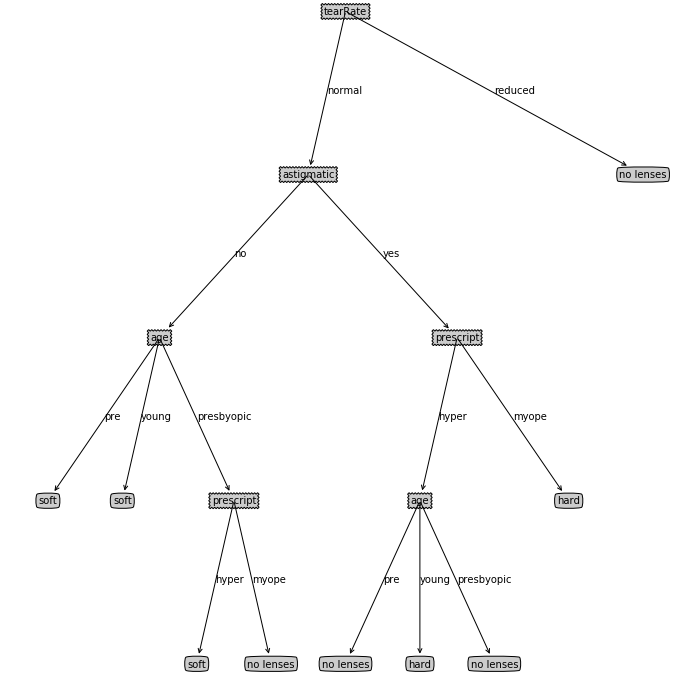

In [17]:
treePlotter.createPlot(lensesTree)

#### Step 5.2 Save classifier 
We save the classifier in a pickle database file. This is so as to load it whenever we want to do classification.



In [18]:
saveDT.storeTree(lensesTree, 'lense_classifier_checkpoint.txt')

### Step 6: Load Classifier for prediction
In the cell above, we had save the classifier in a database so that we won't need to always create it each time we want to make predictions. So, here we load the classifier for prediction

**NB:** Start from here if you are running this notebook more than once and had run this cell before. But first, run the first cell which will import all modules.

#### Step 6.1 load classifier

In [19]:
Classifier = saveDT.grabTree('lense_classifier_checkpoint.txt')

In [20]:
Classifier

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

#### Step 6.2 Predict

Now that we have our train classifier and was able to save and load it in from a database, we now need to test our classifier. The code will take the tree and the label vector we used to create our tree, then it will take the data under test and compare it against the value in the decision tree. It will do this recursively until it hits a leaf node; then it will stop because it has arrived at a conclusion.

In [23]:
def classify(inputTree, featLabels, testVec):
    
    # In python 2.x, '.keys()' return a list while in python 3.x, it returns a dict_key which is 
    # similar to a set. So it doesn't support indexing. We could nest it in a list object as below
    # before indexing.
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    classLabel = str("Unknown")
    #set_trace()
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [24]:
predict = classify(Classifier, lensesLabels,["young","hyper","yes","normal"])

In [25]:
predict

'hard'

## Step 7: Section One Evaluation
We were able to build our decision tree algorithm from scratch with python, and using a dataset from UCI Machine Learning Repository, we were able to test our algorithm and it predicted well.

Some libraries like scikit-learn are advance machine learning libraries which implements various machine learning algorithm including decision tree. It might have been easily and less tedious to implement it using this library. However, building it from scratch was neccessary as it enabled us to look in to hidden details so as to better understand how decision tree works.
